# Loan Data from Prosper
## by Amer Jadid


## Table of Content:

- [1. Preliminary Wrangling](#1)
    - [1.1 Loading data & preforming data wrangling](#1.1)
    - [1.2 Dataset Structure](#1.2)
- [2. Univariate Exploration](#2)
    - [2.1 Distribution Plot for Numeric Variables](#2.1)
    - [2.2 Distribution Plot for Categorical Variables](#2.2)
- [3. Bivariate Exploration](#3)
    - [3.1 Numeric Data Exploration](#3.1)
    - [3.2 KDE plot for MonthlyLoanPayment vs. LoanOriginalAmount](#3.2)
    - [3.3 Heatmap for LoanMonthsSinceOrigination vs. MonthlyLoanPayment](#3.3)
    - [3.4 Time Series Plot](#3.4)
    - [3.5 Categorical Bivariate Plot](#3.5)
    - [3.6 FacetGrid Plot of Distributions](#3.6)
    - [3.7 BorrowerRate and the BorrowerAPR Normality Plot](#3.7)
- [4. Multivariate Exploration](#4)
    - [4.1 Matrix Scatter Plot](#4.1)
    - [4.2 Boxplot & Pointplot](#4.2)
    - [4.3 Feature Engineering](#4.3)
    - [4.4 Heatmap](#4.4)

## 1. Preliminary Wrangling<a class="anchor" id="#1"></a>

>This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

>What factors affect a loan’s outcome status?


>What affects the borrower’s APR or interest rate?


>Are there differences between loans depending on how large the original loan amount was?

https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1587502762819000

### Main Imports

</br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#additional packages for further analysis
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

%matplotlib inline

### 1.1 Loading data & preforming data wrangling<a id='1.1'></a>

</br>

In [3]:
#Read raw data, Column definition & drop duplicates
raw_data = pd.read_csv('~/Desktop/Data Analysis Udacity Projects/Project 5/data_visualization_project/prosperLoanData.csv').rename(mapper = {'ListingCategory (numeric)': 'ListingCategory'}, axis = 1).drop_duplicates('ListingKey')
data_description = pd.read_csv('~/Desktop/Data Analysis Udacity Projects/Project 5/data_visualization_project/Prosper Loan Data - Variable Definitions.csv', index_col='Variable').rename(mapper = {'ListingCategory (numeric)': 'ListingCategory'}, axis = 1).iloc[:,0]

In [4]:
#Choose our columns of interest
columns_of_interest = ['ListingKey', 'ListingCreationDate', 'ClosedDate', 'LoanOriginationDate', 'IsBorrowerHomeowner', 'IncomeVerifiable', 'CreditGrade', 'ListingCategory', 'EmploymentStatus', 
           'IncomeRange', 'ProsperScore', 'EmploymentStatusDuration', 'DebtToIncomeRatio', 'LoanCurrentDaysDelinquent', 'LoanMonthsSinceOrigination', 'MonthlyLoanPayment', 'LoanStatus',
           'BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'BorrowerState']
#slice dataframe by columns of interest
df = raw_data[columns_of_interest]

In [5]:
#Print the memory usage before converting the column to its correct type
print(f'memory usage before converting columns = {df.memory_usage().sum()/1000000:.2f} MB')

memory usage before converting columns = 19.22 MB


In [6]:
#Assign the appropriate type for each column to reduce memory size & improve manipulation tasks
#convert date columns to pandas date time columns
for col in ['ListingCreationDate', 'ClosedDate','LoanOriginationDate']:
    df[col] = pd.to_datetime(df[col])
#convert object columns with limited objects to category type
for col in ['ListingCategory', 'EmploymentStatus']:
    df[col] = df[col].astype('category')

#Income Range Order 
IncomeRange_ord = ['Not employed', 'Not displayed', '$0 ', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
#Credit Grade Order
CreditGrade_ord = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'] #AA (760+), A (720-759), B (680-719), C (640-679), D (600-639), E (560-599), HR (520-599). HR stands for High Risk & NC stands for no credit.
#Loan Status Order(logical order)
LoanStatus_ord = ['Cancelled', 'Defaulted', 'Chargedoff', 'Past Due (>120 days)', 'Past Due (91-120 days)', 'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (16-30 days)', 'Past Due (1-15 days)',
                    'FinalPaymentInProgress', 'Current', 'Completed'] 
#Convert Ordinal data to Ordered Categories
for col, ord in zip(['IncomeRange', 'CreditGrade', 'LoanStatus'], [IncomeRange_ord, CreditGrade_ord, LoanStatus_ord]):
    order = pd.api.types.CategoricalDtype(ord, ordered=True)
    df[col] = df[col].astype(order)

In [7]:
#Print the memory usage before converting the column to its correct type
print(f'memory usage after converting column type = {df.memory_usage().sum()/1000000:.2f} MB')

memory usage after converting column type = 15.27 MB


In [8]:
df.head()

,ListingKey,ListingCreationDate,ClosedDate,LoanOriginationDate,IsBorrowerHomeowner,IncomeVerifiable,CreditGrade,ListingCategory,EmploymentStatus,IncomeRange,...,DebtToIncomeRatio,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,MonthlyLoanPayment,LoanStatus,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,LoanOriginalAmount,BorrowerState
0,1021339766868145413AB3B,2007-08-26 19:09:29.263,2009-08-14,2007-09-12,True,True,C,0,Self-employed,"$25,000-49,999",...,0.17,0,78,330.43,Completed,0.16516,0.1580,3083.333333,9425,CO
1,10273602499503308B223C1,2014-02-27 08:28:07.900,NaT,2014-03-03,False,True,NaN,2,Employed,"$50,000-74,999",...,0.18,0,0,318.93,Current,0.12016,0.0920,6125.000000,10000,CO
2,0EE9337825851032864889A,2007-01-05 15:00:47.090,2009-12-17,2007-01-17,False,True,HR,0,Not available,Not displayed,...,0.06,0,86,123.32,Completed,0.28269,0.2750,2083.333333,3001,GA
3,0EF5356002482715299901A,2012-10-22 11:02:35.010,NaT,2012-11-01,True,True,NaN,16,Employed,"$25,000-49,999",...,0.15,0,16,321.45,Current,0.12528,0.0974,2875.000000,10000,GA
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097,NaT,2013-09-20,True,True,NaN,2,Employed,"$100,000+",...,0.26,0,6,563.97,Current,0.24614,0.2085,9583.333333,15000,MN


### 1.2 Dataset Structure:<a id='1.2'></a>

> The data (after wrangling) contains:

   - 1 unique identifier
   - 3 date-time columns
   - 2 Boolean columns
   - 4 ordered categorical columns (ordinal data)
   - 2 categorical columns (Nominal data type)
   - 1 column that indicates location (BorrowerState)
   - The rest of columns is numeric columns (cardinal data)

#### Main feature of interest:

> The main feature of interest is Loan Stats where it indicates whether the loan is in-progress, or if its defaulted.

#### Features that will help support investigation into the feature of interest:

> The main features that will support our investigation are the BorrowerAPR, BorrowerRate, Stated Monthly Income, & Loan Original Amount.


-----------------------
## 2. Univariate Exploration<a id='2'></a>

### 2.1 Distribution Plot for Numeric Variables<a id='2.1'></a>

How is the Numeric Data distributed? is there any pattern can be found from the univariate plot only?
</br>

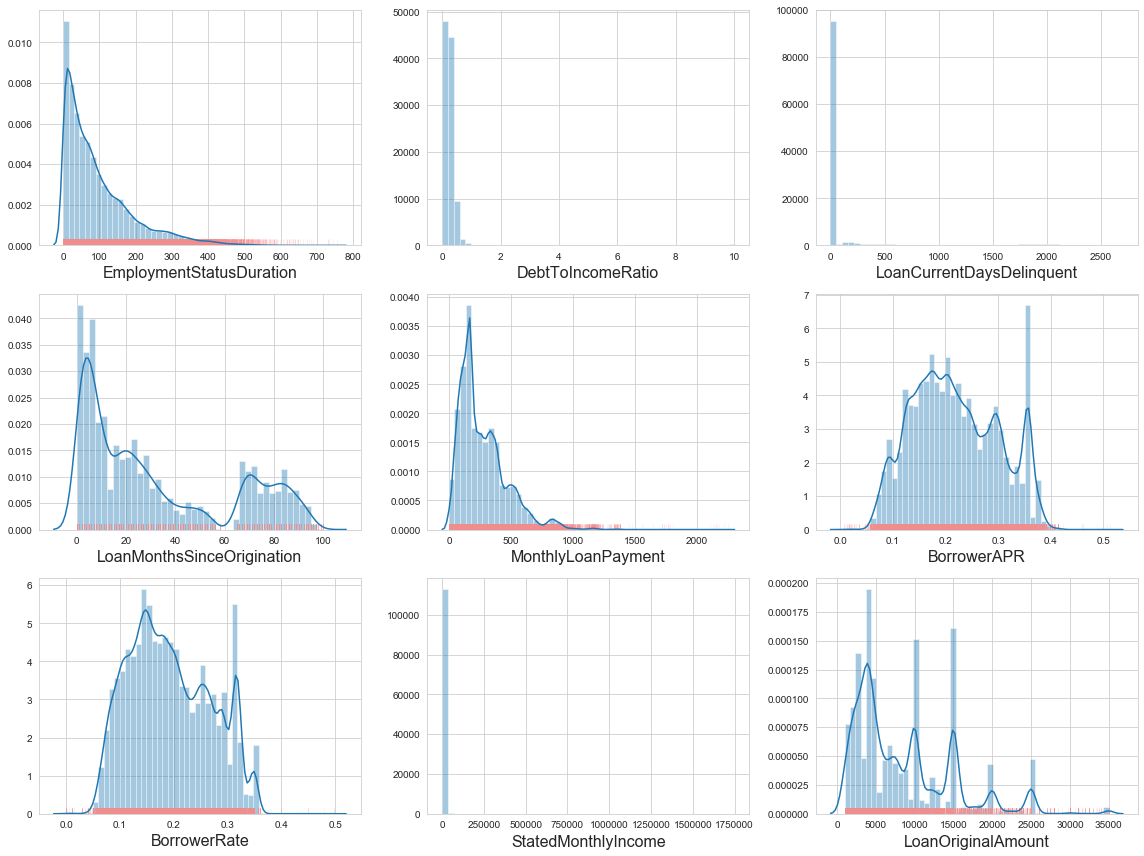

In [9]:
#Create numeric columns names 
hist_columns = ['EmploymentStatusDuration', 'DebtToIncomeRatio', 'LoanCurrentDaysDelinquent', 'LoanMonthsSinceOrigination', 
                'MonthlyLoanPayment' ,'BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount']
#create subplot for each column
figure, ax = plt.subplots(3, 3, figsize=(16, 12))

count = 0
#loop through columns and plot its distribution
for i in range(3):
    for j in range(3):
        if hist_columns[count] not in ['DebtToIncomeRatio', 'LoanCurrentDaysDelinquent', 'StatedMonthlyIncome']:
            sns.distplot(df[hist_columns[count]], ax = ax[i, j], rug=True, rug_kws=dict(alpha = .125, c = '#F98D8D',  height = 0.025))
            ax[i, j].set_xlabel(hist_columns[count], fontsize = 16)
        else:
            sns.distplot(df[hist_columns[count]], ax = ax[i, j], kde = False)
            ax[i, j].set_xlabel(hist_columns[count], fontsize = 16)
        count += 1
        
plt.tight_layout()

  **Observation from above distribution Series:**

   - People tend to borrow money at different interest rates with no obvious pattern (`BorrowerAPR` & `BorrowerRate` are `Normally Distributed Curve`)
   - Most loans are associated with less Employment Status Duration, and the same for debt-to-income ratio which is illustrated by the `High Positive Skewness. `
   - Most of the Monthly loan payments are less than 1000 \$ with some values above 1000 \\$, suggested by the `High Positive Skewness. `
   - Loan Original Amount show an interesting distribution, where most people tend to apply for loans at a multiple of 2500\\$ & 5000\$ shown by the `values spiking at a multiple of 2500$ & 5000$ with positive skewness. `
   - A lot of loans being originated in the last 20 months of the most recent data point, where the `LoanMonthSinceOrigination` follows a positively skewed `bimodal` distribution. Also, the gap at 60 months suggested that no loans were originated in the period where the date is 60 months behind the most recent data point.</br>

</br>

**Further Investigation:</br>**

   - `Stated Monthly Income` & `Loan Current Days Delinquent` needs to be plotted on a different zoom-in level, since that data is being distorted by the high frequency of zero values or we might need to perform a transformation to get more insights.
   - `BorrowerAPR` & `BorrowerRate` shows no pattern which indicates that it needs to be investigated in conjunction with other variables.

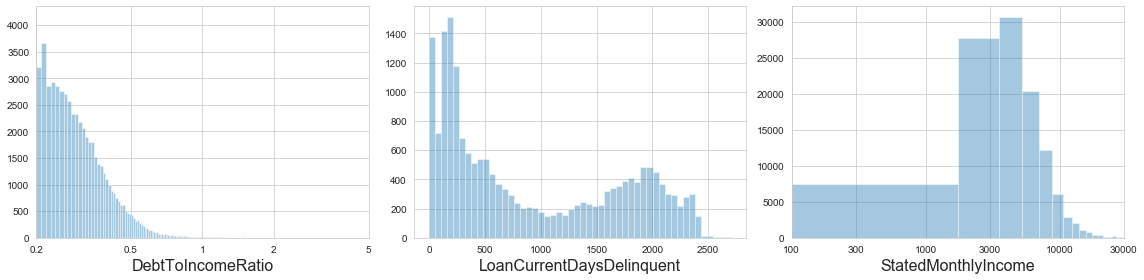

In [10]:
#Create distribution plots for 'DebtToIncomeRatio', 'LoanCurrentDaysDelinquent', & 'StatedMonthlyIncome'
figure, ax = plt.subplots(1, 3, figsize=(16, 4))

#List columns for more investigation
hist_columns = ['DebtToIncomeRatio', 'LoanCurrentDaysDelinquent', 'StatedMonthlyIncome']
xticks = [[.2, .5, 1, 2, 5], [], [100, 300, 1000, 3000, 10000, 30000]]
xlables = [[.2, .5, 1, 2, 5], [], [100, 300, 1000, 3000, 10000, 30000]]

for i in range(3):
    #Plot 'DebtToIncomeRatio', 'StatedMonthlyIncome' on log-scale
    if hist_columns[i] != 'LoanCurrentDaysDelinquent':
        sns.distplot(df[hist_columns[i]], ax = ax[i], kde = False, bins = 1000)
        ax[i].set_xscale('log')
        ax[i].set_xticks(xticks[i])
        ax[i].set_xticklabels(xlables[i])
        ax[i].set_xlim([min(xticks[i]), max(xticks[i])])
        ax[i].set_xlabel(hist_columns[i], fontsize = 16)
    else:
        #Plot 'LoanCurrentDaysDelinquent' with values greater than ZERO
        sns.distplot(df.query(f'{hist_columns[i]} > 0')[hist_columns[i]], ax = ax[i], kde = False, bins = 50)
        ax[i].set_xlabel(hist_columns[i], fontsize = 16)
    
plt.tight_layout()

**Observation from above distribution Series:**

   - `Debt To Income Ration (log x-scale)` is positively skewed with most people have $DebtToIncome = \frac{Total of Monthly Debt Payments}{Gross Monthly Income} < 0.5$ which means `more people (i.e. More data points) ` with `less DebtToIncome` applied for loans.
   - `Loan Current Days Delinquent (normal x-scale) ` have a `bimodal` distribution with high frequencies near 200 & 2000 days.
   - `Stated Monthly Income (log x-scale) ` shows different ranges of monthly income, with flat frequency from 100\\$ to 2000\\$, high income frequencies near 3000\\$ then it starts to decline when reaching 30000\\$.


### 2.2 Distribution Plot for Categorical Variables<a id='2.2'></a>

What are the main categories in the Loan Status? and does are the maximum value for each plot represents?
</br>

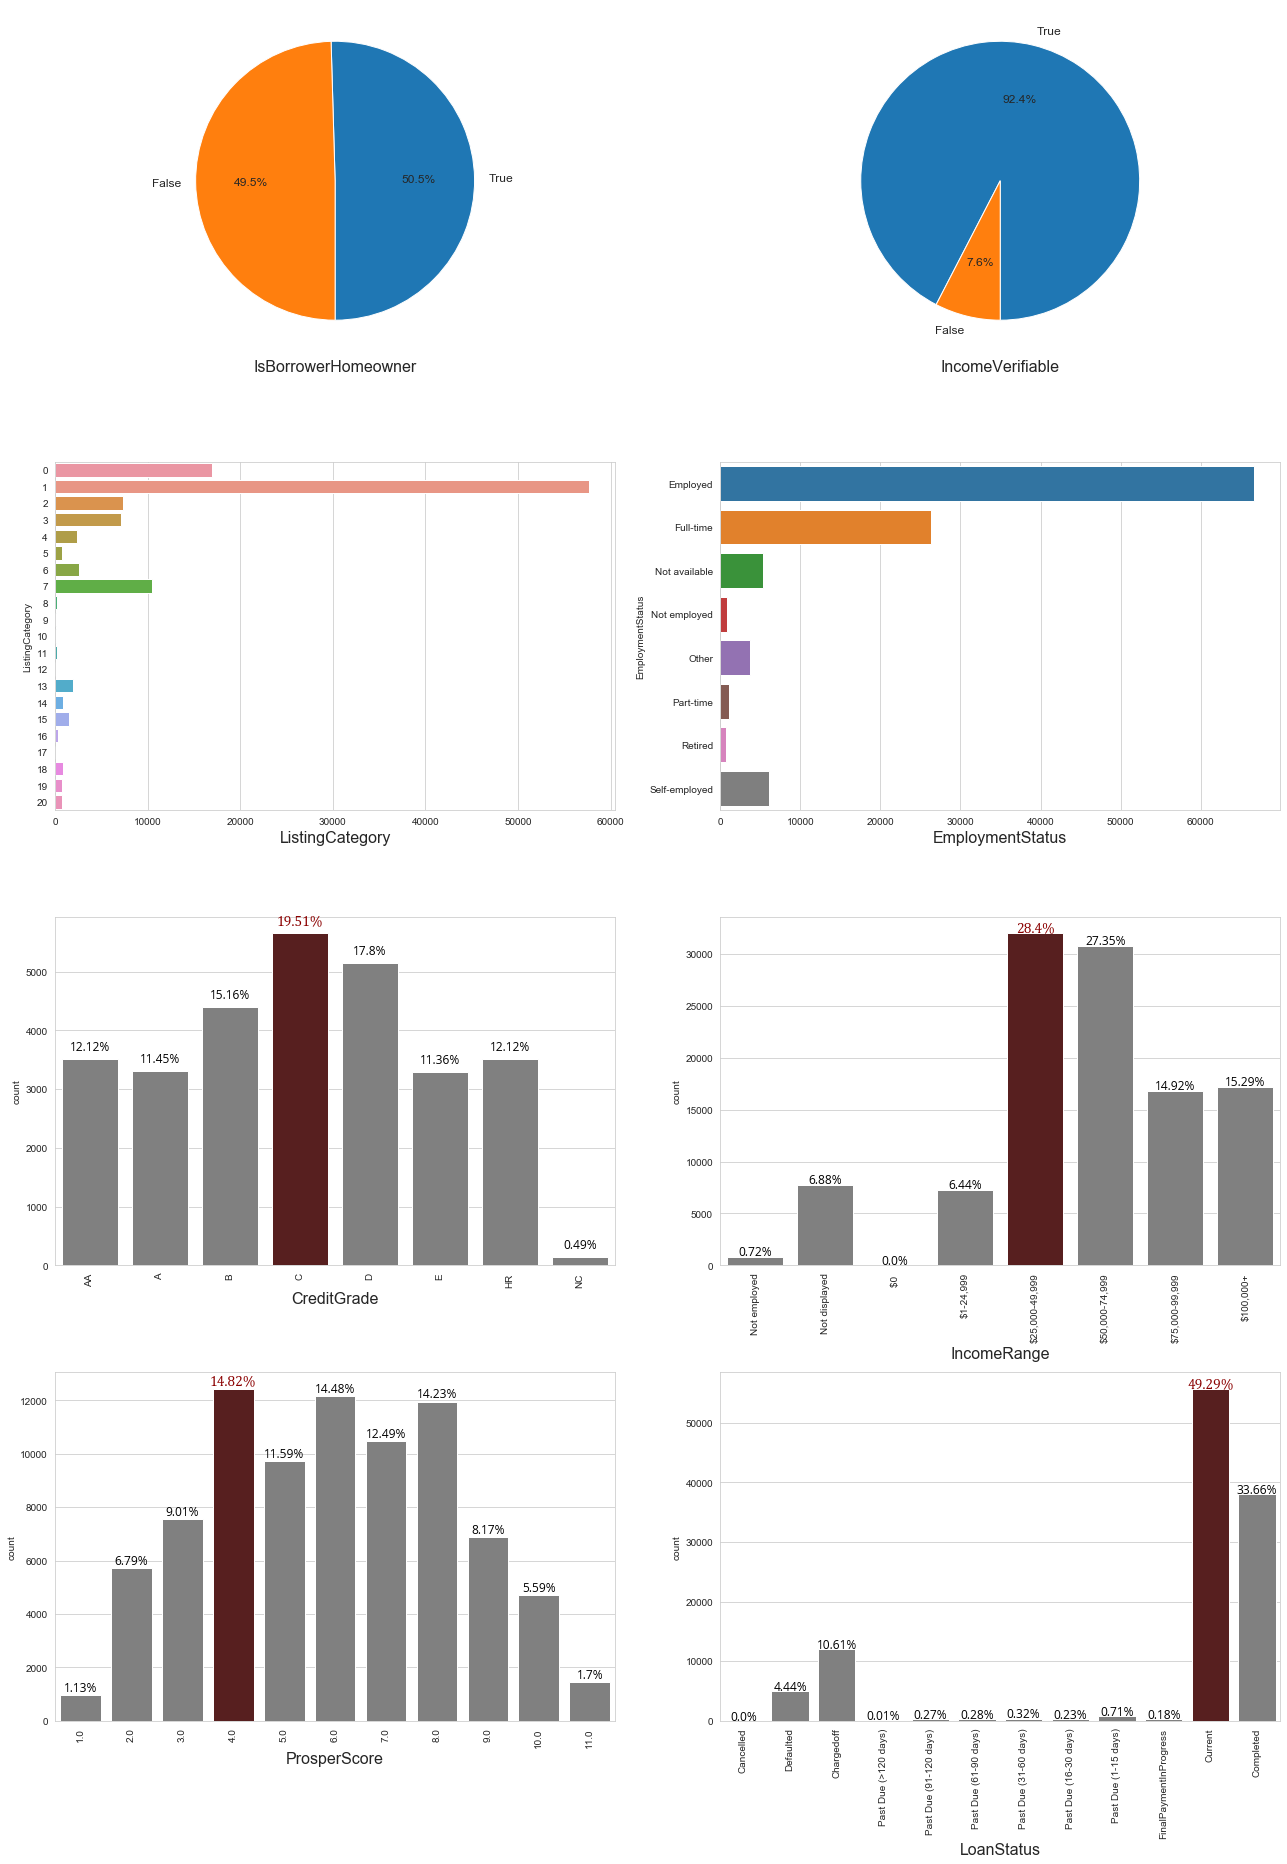

In [11]:
#create categorical columns name for plotting
cat_columns = ['IsBorrowerHomeowner', 'IncomeVerifiable', 'ListingCategory', 'EmploymentStatus', 'CreditGrade', 'IncomeRange', 'ProsperScore', 'LoanStatus']
#calculate the value counts for the last 4 ordered categorical columns 
values_list = [df[col].value_counts(sort=False).sort_index().values for col in cat_columns[-4:]]
#normalize the values for better interpretation of the distribution 
normalized_values = [np.round(df[col].value_counts(sort=False, normalize=True).sort_index().values*100, 2) for col in cat_columns[-4:]]

#Create subplots for each categorical column
figure, ax = plt.subplots(4, 2, figsize=(18, 26))

#initiate a counter to track the index of the column name
count = 0
for i in range(2):
    for j in range(2):
        #make a pie plot for the first 2 Boolean columns 
        if cat_columns[count] in ['IsBorrowerHomeowner', 'IncomeVerifiable']:
            ax[i, j].pie(df[cat_columns[count]].value_counts(), labels= df[cat_columns[count]].value_counts().index, autopct='%1.1f%%', startangle=-90, textprops = dict(fontsize = 12))
            ax[i, j].set_xlabel(cat_columns[count], fontsize = 16)
        #Make a horizontal count plot for the 2 nominal columns stated below 
        elif cat_columns[count] in ['ListingCategory', 'EmploymentStatus']:
            sns.countplot(y = df[cat_columns[count]], ax = ax[i, j])
            ax[i, j].set_xlabel(cat_columns[count], fontsize = 16)
        else:
            pass
        count += 1
i = 2
j = 0

#make a countplot for the last 4 ordered categorical columns 
for ii, col in enumerate(cat_columns[-4:]):    
    sns.countplot(df[col], ax=ax[i, j], palette = ['grey' if x < max(values_list[ii]) else '#601616' for x in values_list[ii]])#make maximum bar red while the others grey
    ax[i, j].set_xlabel(col, fontsize = 16)
    plt.sca(ax=ax[i, j])
    locx, _ = plt.xticks(rotation=90)
    for x, y, s in zip(locx, values_list[ii], normalized_values[ii]):
        if y == max(values_list[ii]):
            plt.text(x, y+150, str(s) + '%', ha='center', fontsize=14, color='darkred', fontname = 'Cambria')
        else:
            plt.text(x, y+150, str(s) + '%', ha='center', fontsize=12, color='k', fontname = 'Open Sans')
    j += 1
    if j == 2:
        j = 0
        i += 1
    else:
         pass
        
plt.tight_layout()
        

**Observation from above Categorical Plot Series:**

   - The first pie plots show that `half of people applying for loans own home`, while the second shows `92.4% of people have a verifiable source of income` at the time applying for loan.
   - for the `ListingCategory` horizontal bar plot we can see that most people (Category 1) are applying for loan to cover other liabilities and consumer debts (`definition by Investopedia `https://www.investopedia.com/terms/d/debtconsolidation.asp)
   - Most people are `Employed` & `Full Time` (2nd horizontal bar plot) 
   - For the `Income Range`, Most people applying for loan have income range between 25k and 75k per year. </br>
   
   
   - `Credit Grade` have most of its values at C, which represents an intermediate risk for the lender, but note that the data available for credit grade is prior to 2009, whereas ProsperScore is available after 2009, and that might indicates that `CreditGrade is being replaced by another indicator for measuring risk associated with lending, which might be the ProsperScore.`
   - `ProsperScore` have counts peaking at category 4, 6, and 8 which represents intermediate risk for the lender. </br>
   
   
   - **For the final and most important variable (`LoanStatus`):**
     - Current (Running Loans) represents about half of loans.
     - Completed Loans represents 44% of Loans.
     - Defaulted (borrower fails to pay back a debt according to the initial arrangement) represents about 4.5% while charged-off (amount of debt is unlikely to be collected) represents 10.7%. </br>
     </br>
     
     **As a lender, I'm interested in knowing what data might help me predict Loan Status and what loans are associated with the highest risk of defaulting.**


---------------------

## 3. Bivariate Exploration<a id='3'></a>

### 3.1 Numeric Data Exploration<a id='3.1'></a>

</br>

Our data contains around `114,000 rows`, which means that `plotting all data` at a time will probably `provides no insights` and/or will lead to a crowded chart that is not interpretable. </br>

Instead I will be using `binning statistics to simplify the plot and reduce noise. `</br>

**Below is a representation of the same scatter plot with & without binning data:**

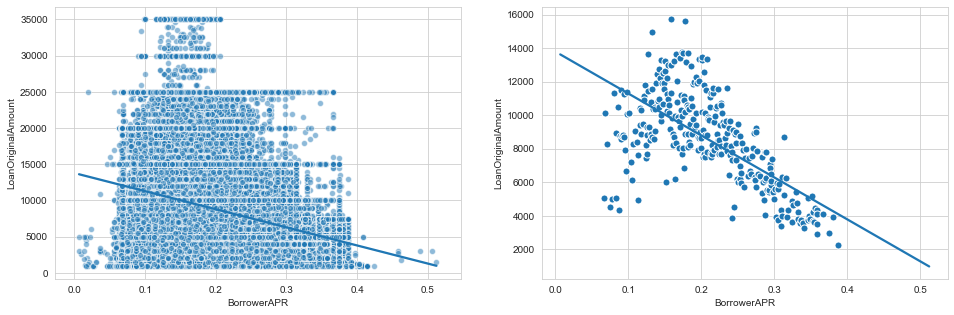

In [12]:
#create 2 subplots
figure, ax = plt.subplots(1, 2, figsize=(16, 5))

#Scatter BorrowerAPR vs. Loan Original Amount using the whole data
sns.regplot(x = 'BorrowerAPR', y = 'LoanOriginalAmount',data = df, ax = ax[0], 
            scatter_kws=dict(edgecolor = 'w', alpha = 1/2))
#Scatter BorrowerAPR vs. Loan Original Amount using the mean of the Loan Original Amount 
#with BorrowerAPR bins equal to the square root of the whole data length
sns.regplot(x = 'BorrowerAPR', y = 'LoanOriginalAmount',
                  x_estimator=np.mean, x_bins=int(np.sqrt(len(df))),
                  ci=None, data = df,scatter_kws=dict(edgecolor = 'w'), ax = ax[1]);

**Observation from above Scatter Plots:**

What is the relation between Loan Original Amount and Interest rate?

   - The binning statistics of the second scatter plot clearly reveals the `negative correlation between the two variables. ` When `BorrowerAPR increase the mean of the LoanOriginalAmount decrease`.
   - In other words, assuming that the BorrowerAPR(Interest Rate) event accrues before the LoanOriginalAmount, `people tend to take small loans when the interest rate increase.`</br>
   
**`Note that for the rest of the plots, I will be using Binning Statistics instead of plotting the whole data. `**

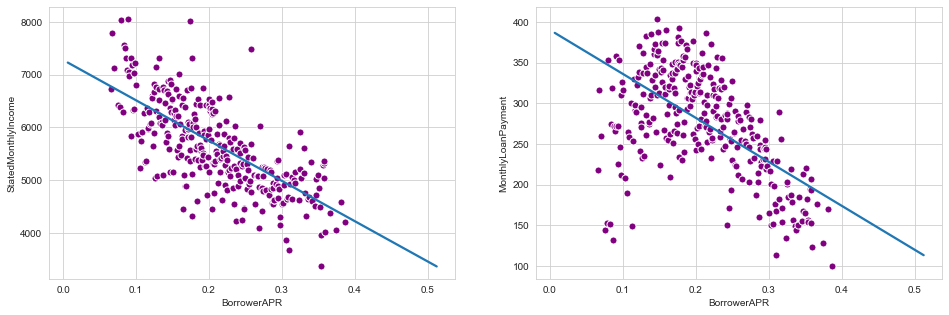

In [13]:
#create 2 subplots
figure, ax = plt.subplots(1, 2, figsize=(16, 5))

#Scatter BorrowerAPR vs. Mean of Stated Monthly Income binned by BorrowerAPR
sns.regplot(x = 'BorrowerAPR', y = 'StatedMonthlyIncome',
                  x_estimator=np.mean, x_bins=int(np.sqrt(len(df))),
                  ci=None, data = df,scatter_kws=dict(edgecolor = 'w', color ='purple'), ax = ax[0]);
#Scatter BorrowerAPR vs. Mean Monthly Loan Payment binned by BorrowerAPR
sns.regplot(x = 'BorrowerAPR', y = 'MonthlyLoanPayment',
                  x_estimator=np.mean, x_bins=int(np.sqrt(len(df))),
                  ci=None, data = df,scatter_kws=dict(edgecolor = 'w', color = 'purple'), ax = ax[1]);

**Observation from above Scatter Plots:**

Is there any other variables that are correlated with the interest rate?

   - There is `negative correlation between the two variables, ` for both scatter plots where the mean of both `StatedMonthlyIncome & MonthlyLoanPayments Decrease as the Interest Rate (BorrowerAPR) Increase`.</br>
   - This `negative correlation` behavior needs to be investigated in conjunction with other variables, as there is `No logical correlation(No Causality)` between StatedMonthlyIncome & the Interest Rate (BorrowerAPR).


### 3.2 KDE plot for MonthlyLoanPayment vs. LoanOriginalAmount<a id='3.2'></a>

Do we have any interaction between our features?
</br>

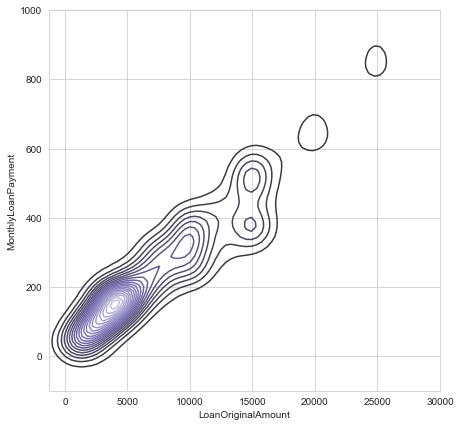

In [14]:
#Sample 5% of data without replacement for plotting purposes 
data = df.sample(frac=0.05)
plt.figure(figsize = (7, 7))
sns.kdeplot(data.LoanOriginalAmount, data.MonthlyLoanPayment, n_levels=int(np.sqrt(len(data))/3), cmap="Purples_d")
plt.ylim([-100, 1000])
plt.xlim([-1250, 30000]);

**Observation from above KDE Plot:**

   - We can see a huge `cluster(contours)` of data `at the diagonal of the plot`. 
   - Loan Monthly Payment is highly associated with the Loan Original Amount, which illustrates it negative correlation with the interest rate(BorrowerAPR)

### 3.3 Heatmap for LoanMonthsSinceOrigination vs. MonthlyLoanPayment<a id='3.3'></a>

What is the relation between the Montly Loan Payment and Loan Months Since Origination?
</br>

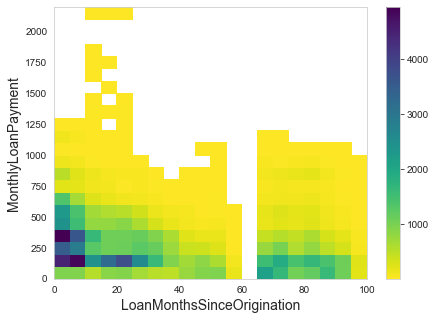

In [15]:
#Create a heatmap using hist2d from matplotlib
plt.figure(figsize = (7, 5))
bins_x = np.arange(0, 100 + 5, 5)
bins_y = np.arange(0, 2230, 100)
plt.hist2d(data = df, x = 'LoanMonthsSinceOrigination', y = 'MonthlyLoanPayment',
            cmap = 'viridis_r',  bins = [bins_x, bins_y], cmin = 0.5)
plt.xlabel('LoanMonthsSinceOrigination', fontsize = 14)
plt.ylabel('MonthlyLoanPayment', fontsize = 14)
plt.colorbar();

**Observation from above Heatmap Plot:**

   - Most of the `Monthly Loan Payments accrues at the early months of loan origination’ and started to `decrease gradually to reach no payments at month 60. `
   - `5 months later`, `another cluster of payments happened` directly, which might be illustrated as a period where the `lender did not receive any payments due to external event. ` 

### 3.4 Time Series Plot<a id='3.4'></a>

Does the Count of Loans or Interest Rate have any trend?
</br>

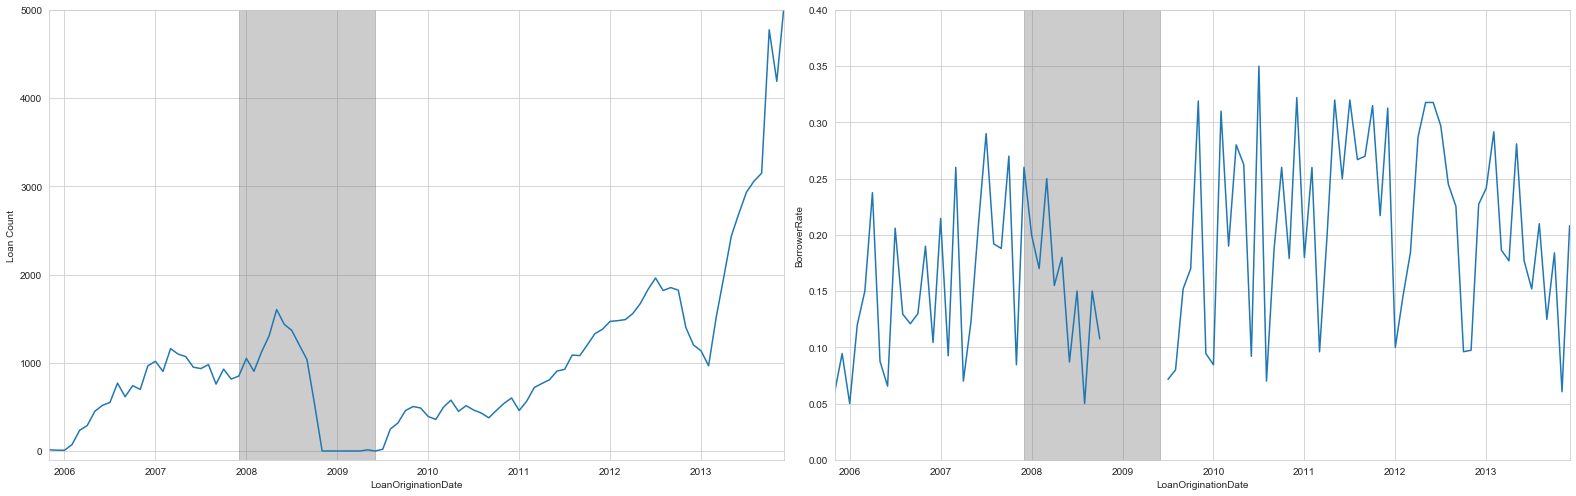

In [16]:
#Create 2 subplots
figure, ax = plt.subplots(1, 2, figsize=(22, 7))

#set the LoanOriginationDate as a date time index, resample to monthly frequency, count the number for loans during each month, then slice data till the start of 2014(as the data during 2014 is incomplete)
#plot the data where date is depicted on the x-axis and the count of loans is depicted on the y-axis 
ax[0] = df.set_index('LoanOriginationDate').sort_index().resample('M').size().loc[:'2013'].plot(label = 'Originated Date', ax = ax[0])
#shade the area were the Recession happened during the financial crisis 2008 
#dates are from (https://fredhelp.stlouisfed.org/fred/data/understanding-the-data/recession-bars/) 
ax[0].fill_betweenx(y = [-100, 6000], x1 = '2007-12-01', x2 = '2009-06-01', color = 'grey', alpha = 0.4)
ax[0].set_ylabel('Loan Count')
ax[0].set_ylim([-100, 5000])

#same for the BorrowerAPR with the BorrowerAPR last value of each month is the interest rate and shade recession period
ax[1] = df.set_index('LoanOriginationDate').sort_index().resample('M').last()['BorrowerRate'].loc[:'2013'].plot(label = 'BorrowerRate')
ax[1].fill_betweenx(y = [0, 0.4], x1 = '2007-12-01', x2 = '2009-06-01', color = 'grey', alpha = 0.4)
ax[1].set_ylabel('BorrowerRate')
ax[1].set_ylim([0, 0.4])

plt.tight_layout();

**Observation from above Line Plots:**

   - The count of Loans `increased gradually from 2006 till the first quarter of 2008`, where about `1500 loans where given in one month`, then the `financial crisis happened(shaded region)` and the `count declined heavily to reach zero in 2009`, then it start to `recover gradually after the financial crisis in the middle of 2009` to `beak in middle of  2012` then to `dip back in 2013` after words  to `grow exponentially in late 2013 to more than 5000 loans in one month.`
   - The `BorrowerRate` does not done provide any clue on the trend, where the BorrowerRate is `ranging between 5% and 35%.`</br>

### 3.5 Categorical Bivariate Plot<a id='3.5'></a>

What factors affect a loan’s outcome status?
</br>

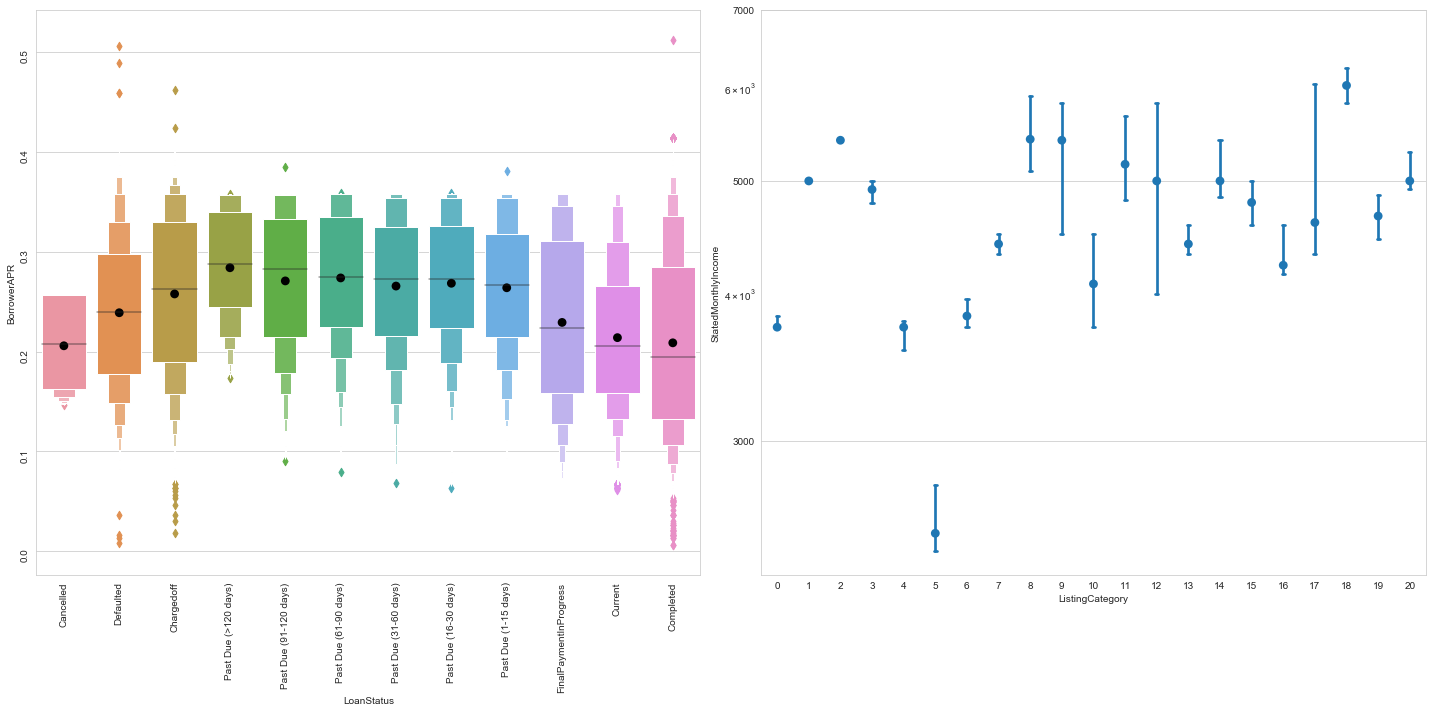

In [17]:
#Create 2 subplots
figure, ax = plt.subplots(1, 2, figsize=(20, 10))


num_var = 'BorrowerAPR'
cat_var = 'LoanStatus'

#create a boxenplot(suited for large data)
ax[0] = sns.boxenplot(y = num_var, x = cat_var,
             data = df, ax = ax[0])
#overlay the mean over the boxen plot
sns.pointplot(y = num_var, x = cat_var,
             data = df, estimator=np.mean, errwidth=0,color = 'black', ax = ax[0], join=False)
ax[0].tick_params(labelrotation=90)

#create a point plot for each category
ax[1] = sns.pointplot(y = 'StatedMonthlyIncome', x = 'ListingCategory',
             data = df, estimator=np.median, capsize=.1, ax = ax[1], join = False)
ax[1].set_yscale('log')
ax[1].set_yticks([3000, 5000, 7000])
ax[1].set_yticklabels([3000, 5000, 7000])

plt.tight_layout();

**Observation from above Categorical Bivariate Plots:**

   - The first plot is `boxen-plot` which is a combination between boxplot & violinplot that is suited for `huge data points. `
   - The `Median` of Current and `Completed loans` for Loan Status is `lower than` those of `Defaulted Loans`, charged off and the other Past Due, which means that `loans with low BorrowerAPR is less likely to be defaulted or charged off. ‘And the `Mean (Black Dot) ` tells the same story as the median.
   - `Category 18(Taxes)` in `ListingCategory` have the `highest median monthly stated income` between all categories. 

### 3.6 FacetGrid Plot of Distributions<a id='3.6'></a>

How does interest rate differ in distribution inside each category of the prosper score? Is there any pattern?
</br>

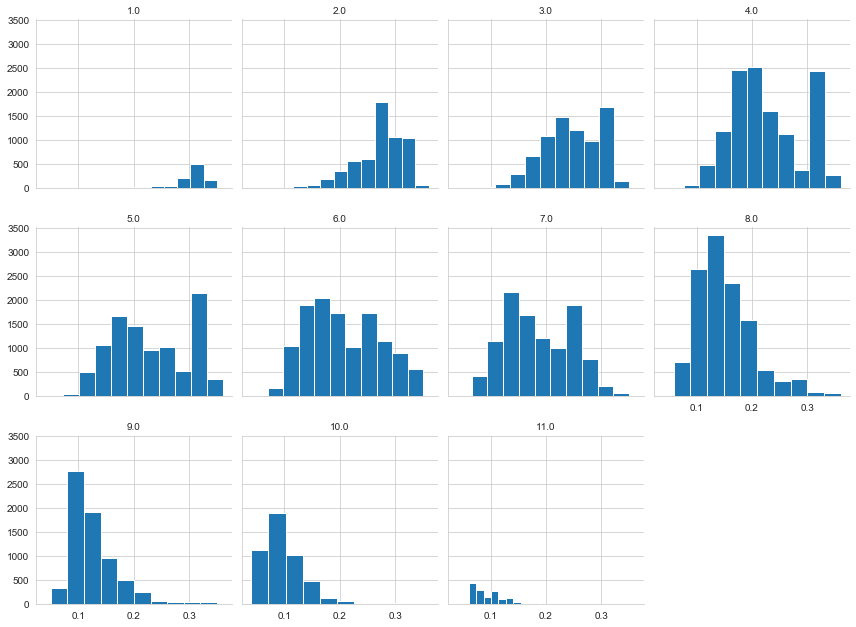

In [18]:
#Create a FacetGrid for the BorrowerRate disruption segmented by ProsperScore 
g = sns.FacetGrid(data = df, col = 'ProsperScore', col_wrap = 4, size = 3)
g.map(plt.hist, 'BorrowerRate')
g.set_titles('{col_name}')
g.set(xlabel = '');

**Observation from above FacetGrid Plot:**

   - Here we can see and `interesting Pattern` on the behavior of `people with different Prosper Score`, where people with `low prosper score` tend to take loans with `High interest rate(BorrowerRate)` and it's illustrated by the negative skewness of the distribution with Prosper Score of 1. 
   - This `distribution start to shift gradually to the right` as the `Prosper Score increases, ` where we can see an obvious positive skewness for `Prosper Scores greater than 8` that have a `low interest rate. ` 

### 3.7 BorrowerRate and the BorrowerAPR Normality Plot: <a id='3.7'></a>

Is the interest rate Normally distributed?
</br>

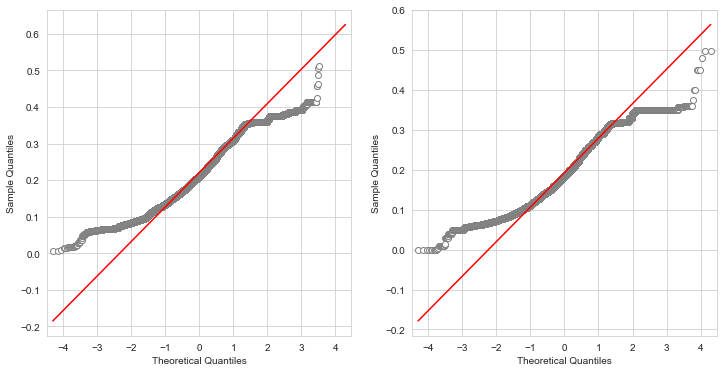

In [19]:
#Create 2 subplots
figure, ax = plt.subplots(1, 2, figsize=(12, 6))

#use qqplot from statsmodels(refer to the imports above)
qqplot(df.BorrowerAPR, line = 'q', ax = ax[0], mec = 'grey', mfc = 'w')
qqplot(df.BorrowerRate, line = 'q', ax = ax[1], mec = 'grey', mfc = 'w');

**Observation from above Q-Q Plots:**

   - `Both Q-Q Plots` left(BorrowerAPR) & right(BorrowerRate) shows `normality when values lies between 0.1 and 0.3` where the `grey points are attached to the redline.` This `normality starts to deviated at both tails` of the distribution as you go `near 0 or near 0.5.`

------------------------

## 4. Multivariate Exploration<a id='4'></a>

### 4.1 Matrix Scatter Plot<a id='4.1'></a>

what is the relation between our all numeric features ?
</br>

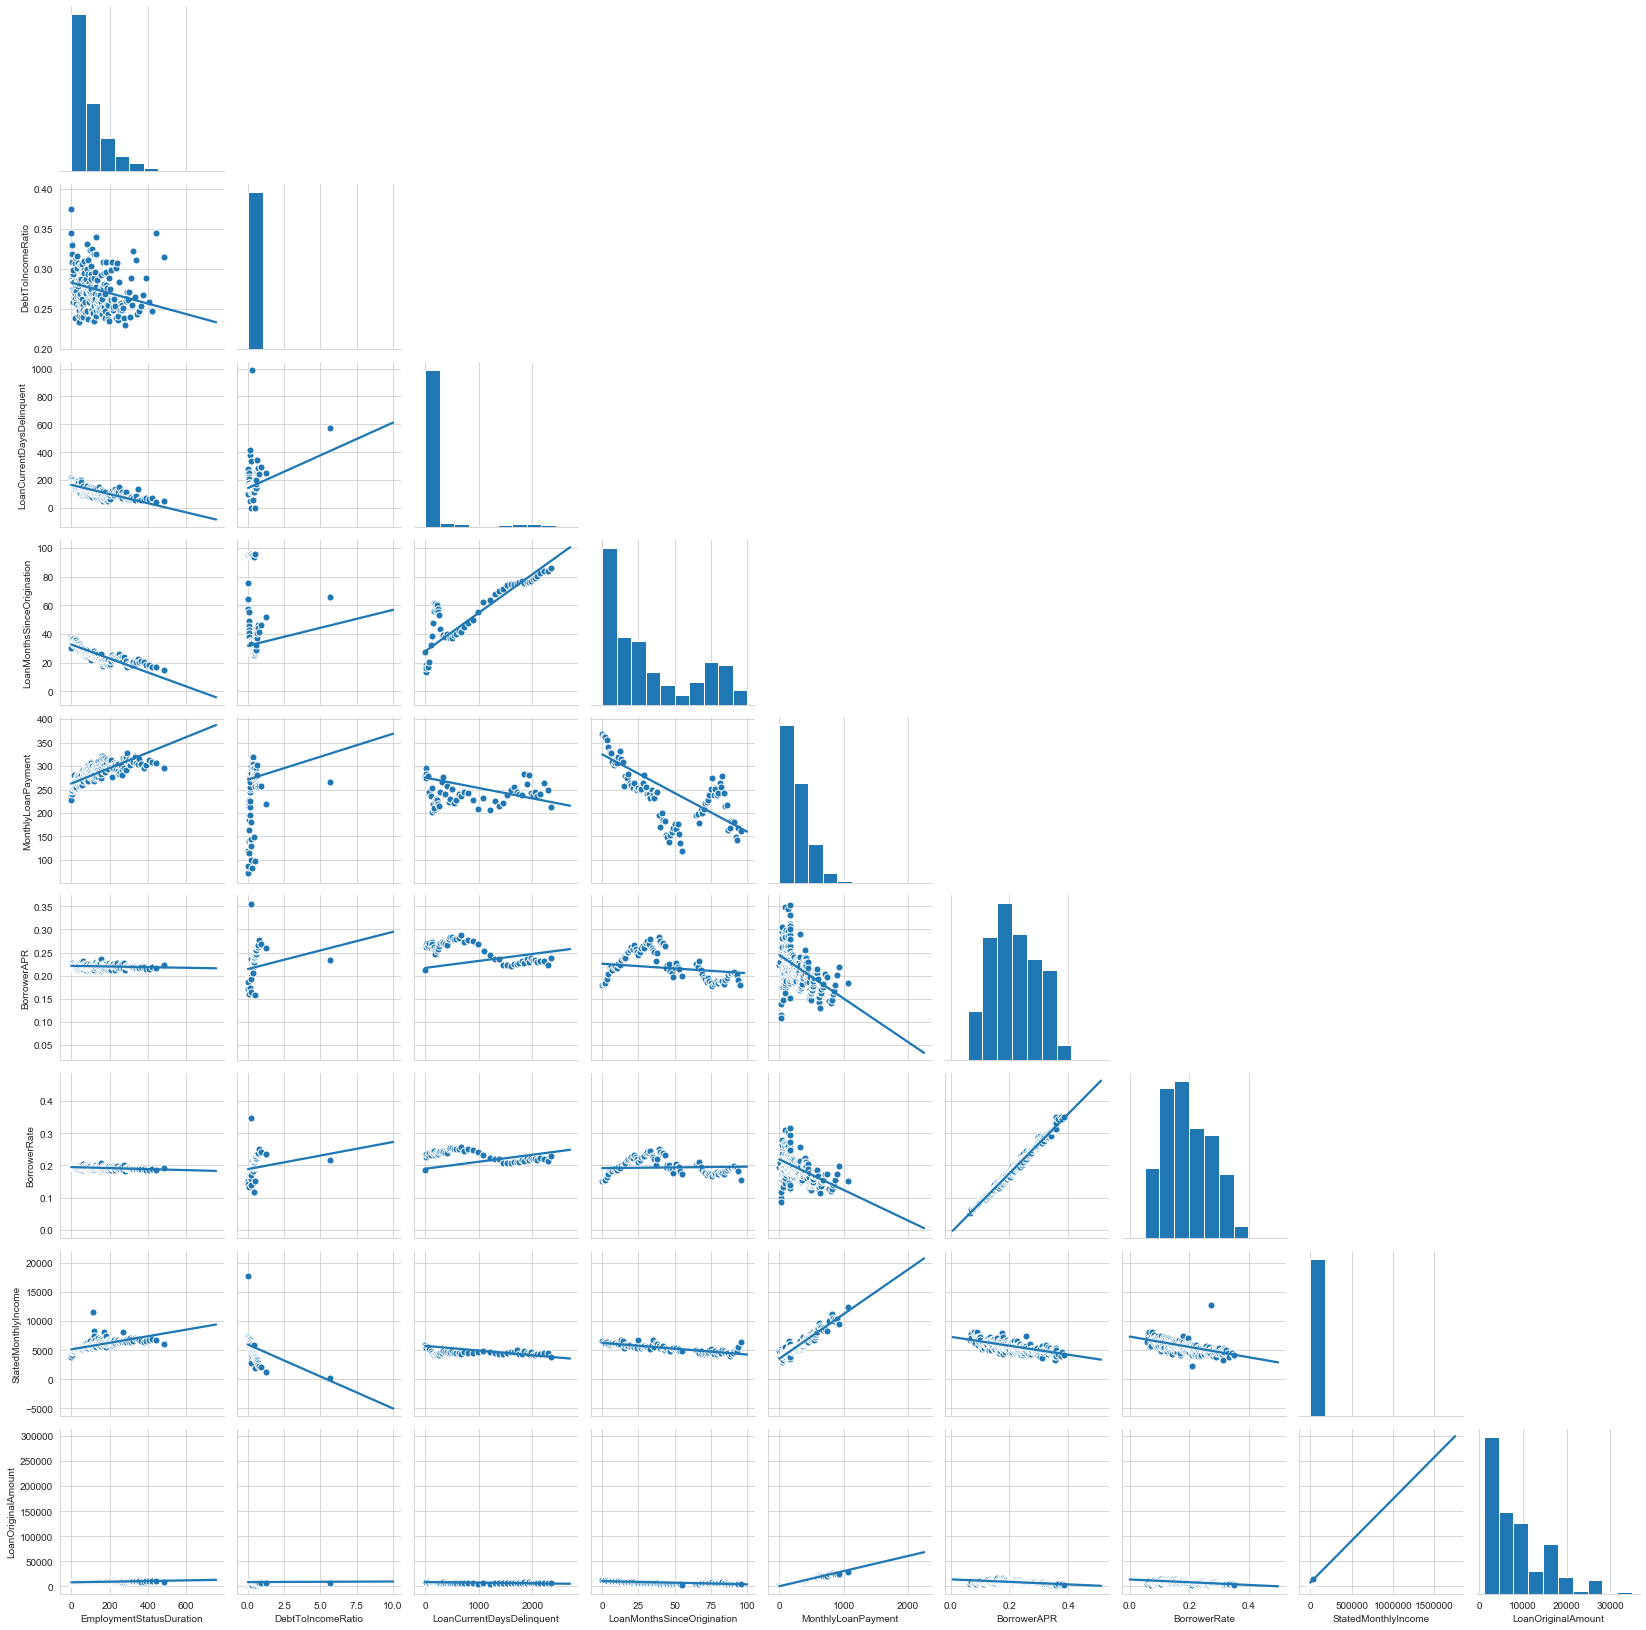

In [20]:
#Create a Pairplot for all the numeric variables
num_columns = ['EmploymentStatusDuration', 'DebtToIncomeRatio', 'LoanCurrentDaysDelinquent', 'LoanMonthsSinceOrigination', 
                'MonthlyLoanPayment' ,'BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount']
#make a fit a linear line on a scatter plot with Mean binning statistics
sns.pairplot(df[num_columns], corner = True, kind = 'reg', plot_kws=dict(x_estimator=np.mean, x_bins=int(np.sqrt(len(df))), ci=None, scatter_kws=dict(edgecolor = 'white')));

**Observation from above Scatter Matrix Plot:**

   - The most correlated feature with the `interest rate` is `MonthlyLoanPayment` with `high positive correlation. `
   - Correlations between Features:
       - Intermediate positive Correlation between EmploymentStatusDuration and MonthlyLoanPayments
       - Debt to income ratio doesn't seems to have any significant linear correlation with other features.
       - LoanCurrentDaysDelinquent have a high positive correlation with LoanMonthSinceOrigination (these 2 variables are almost illustrating almost the same idea)
       - High negative correlation between LoanMonthsSinceOrigination and MonthlyPayments
       - High Positive correlation between MonthlyLoanPayment and StatedMonthlyIncome(technically those 2 variables represent the same idea)
     
**Conclusion:**

   - The above features can be limited, as some `features are almost redundant in explaining the same thing. `
   - I will consider studying `BorrowerRate, StatedMontlyIncome, and LoanOriginalAmount` for the next multivariate data exploration

### 4.2 Boxplot & Pointplot<a id='4.2'></a>

What additional factors affect a loan’s outcome status?
</br>

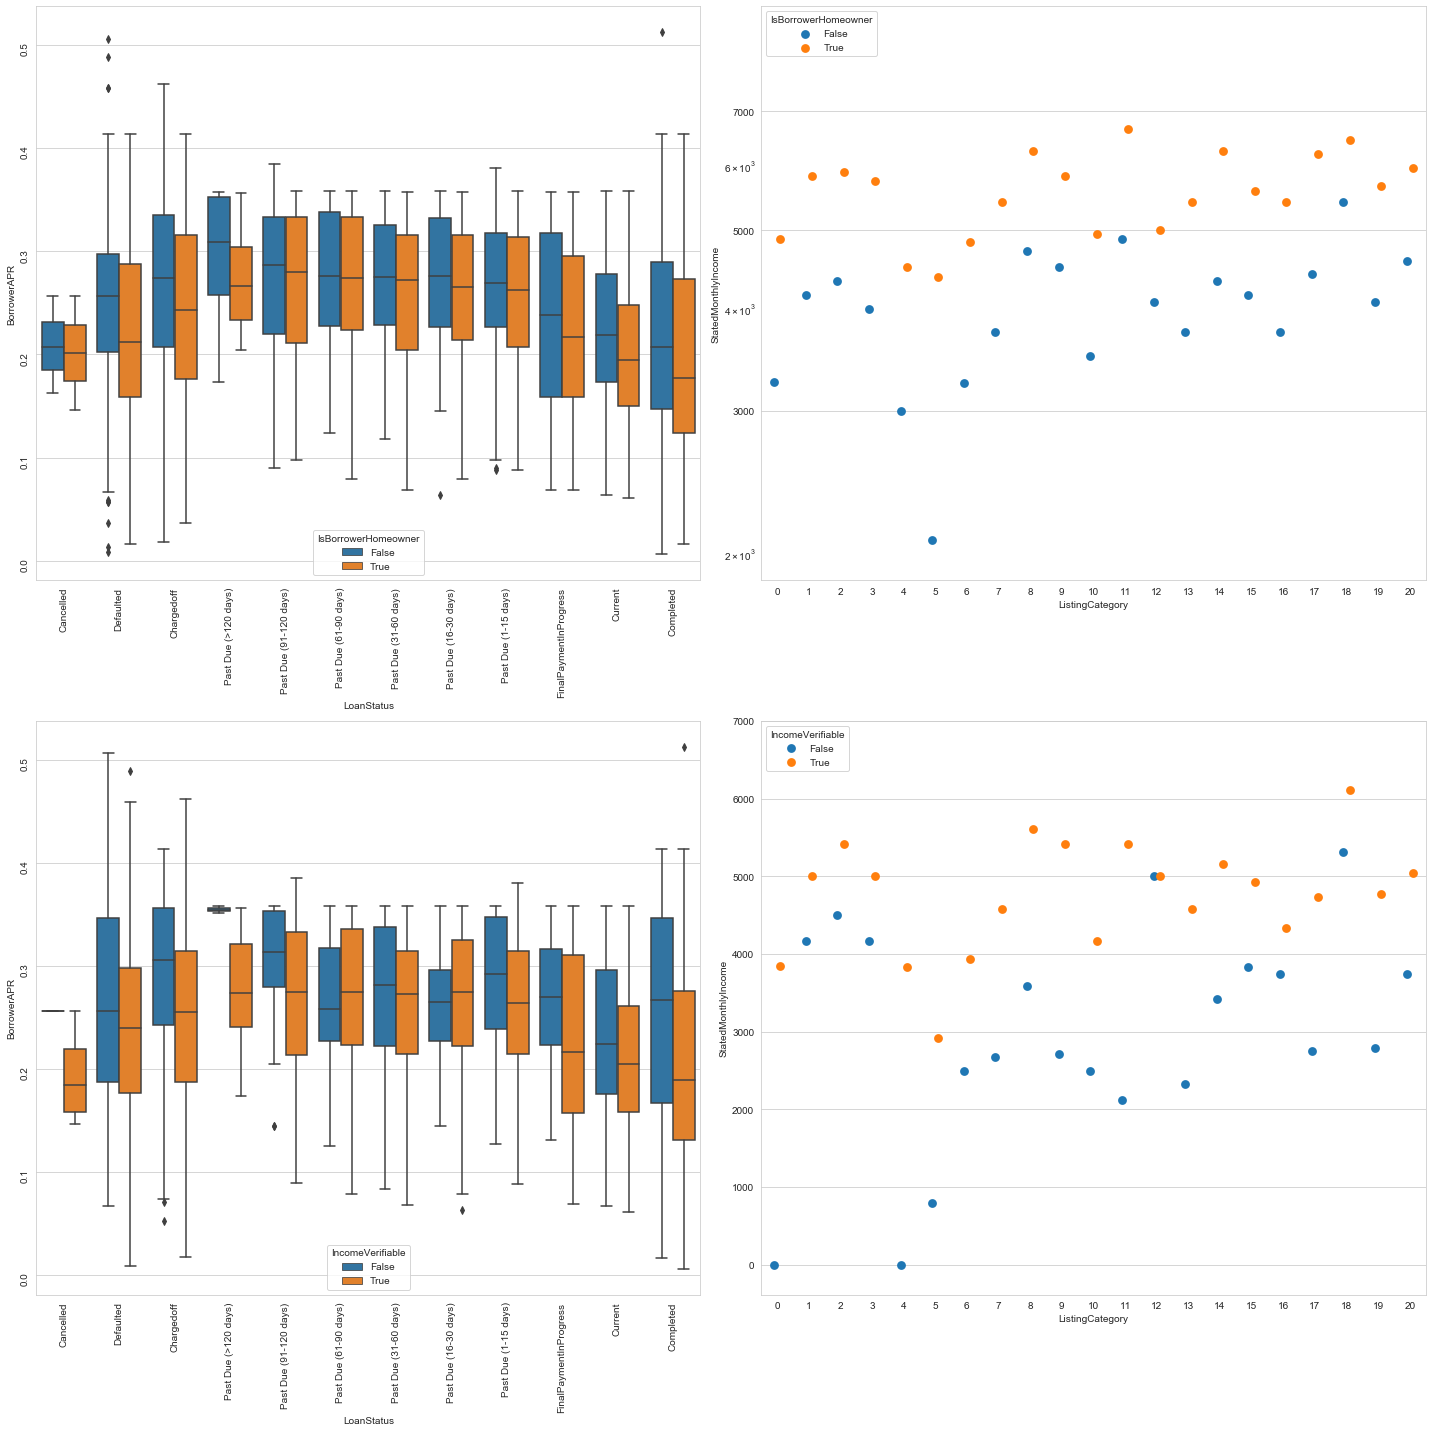

In [21]:
#Create 4 subplots
figure, ax = plt.subplots(2, 2, figsize=(20, 20))


num_var = 'BorrowerAPR'
cat_var = 'LoanStatus'
hue1 = 'IsBorrowerHomeowner'
#Create a box plot with IsBorrowerhomeowner as hue
ax[0, 0] = sns.boxplot(y = num_var, x = cat_var,hue = hue1,
             data = df, ax = ax[0, 0])
ax[0,0].tick_params(labelrotation=90)

#create a point plot for each category
ax[0,1] = sns.pointplot(y = 'StatedMonthlyIncome', x = 'ListingCategory', hue = hue1,
             data = df, estimator=np.median, capsize=.1, ax = ax[0,1], join = False, dodge=.2, errwidth=0)
ax[0,1].set_yscale('log')
ax[0,1].set_yticks([3000, 5000, 7000])
ax[0,1].set_yticklabels([3000, 5000, 7000])

num_var = 'BorrowerAPR'
cat_var = 'LoanStatus'
hue2 = 'IncomeVerifiable'
#Create a box plot with IncomeVerifiable as hue
ax[1,0] = sns.boxplot(y = num_var, x = cat_var,hue = hue2,
             data = df, ax = ax[1,0])

ax[1,0].tick_params(labelrotation=90)

#create a point plot for each category
ax[1, 1] = sns.pointplot(y = 'StatedMonthlyIncome', x = 'ListingCategory', hue = hue2,
             data = df, estimator=np.median, capsize=.1, ax = ax[1, 1], join = False, dodge=.2, errwidth=0)

plt.tight_layout();

**Observation from above Boxplot and Point Plot:**

   - The `Median BorrowerAPR` for all people `Home Owners is lower` that people who doesn't Own Homes, with `Completed LoanStatus` have the `Lowest BorrowerAPR` between all other Categories.
   - The `Median Monthly Income` for `home Owners` is always `higher` than people who doesn’t own Homes for all categories.
   - The `Median BorrowerAPR` for all people whose `Income is Verifiable` is `lower` than people who can't verify their income, with `Completed LoanStatus` have the `Lowest BorrowerAPR` between all other Categories.
   - The `Median Monthly Income` for all people whose `Income is Verifiable` is always `higher` than those who can't verify their income.
     
**In Other Words:**

   - `Home Owners` that `Borrow at small interest` rate are `less likely to default` from people who doesn't own homes and borrows at high interest rate
   - People with `Verified monthly income` are `less likely to default` from people who can't verify their income

### 4.3 Feature Engineering<a id='4.3'></a></br>


#### In this Section I'm going to Engineer New Feature, with the aim to see if a loan is more likely to default.

The New Feature consists of 4 variables: `IsBorrowerHomeowner, Income Verifiable, CreditGrade, and ProsperScore`

**`The reason I'm choosing these Variables is because, from the above analysis:`**

   - Home Owners are Less Likely to Default
   - People with Verifiable Income are Less Likely to Default
   - CreditGrade & ProsperScare have High interest Rate for Low Grade (FacetGrid Grid Distribution-Bivariate Plot), where people who take loans with less interest rate are less likely to default (Boxen-Plot Above)

**The `New Feature (IsLowRisk)` is Boolean which Can Be Interpreted as `True: {(CreditGrade = ['AA', 'A', 'B', 'C'] or ProsperScore > 6) and (have a home) and (the income is verifiable), while False is the opposite`**

</br>

In [22]:
#create a mapper object for low risk, and high risk 
low_risk = dict(zip(['AA', 'A', 'B', 'C'], list(np.ones(4))))
high_risk = dict(zip(['D', 'E', 'HR', 'NC'], list(np.zeros(4))))
risk = {**low_risk, **high_risk}

In [23]:
#Apply the mapper and convert 1 and 0 to true and false
score1 = df.CreditGrade.map(risk).fillna(0)
score2 = df.ProsperScore.apply(lambda x: 1 if (x > 6) else  0).fillna(0)
score = score1+score2
score = score.map({1: True, 0: False})

In [24]:
#create the new feature(IsLowRisk) by multiplying all of the features 
df['IsLowRisk'] = score * df.IsBorrowerHomeowner * df.IncomeVerifiable

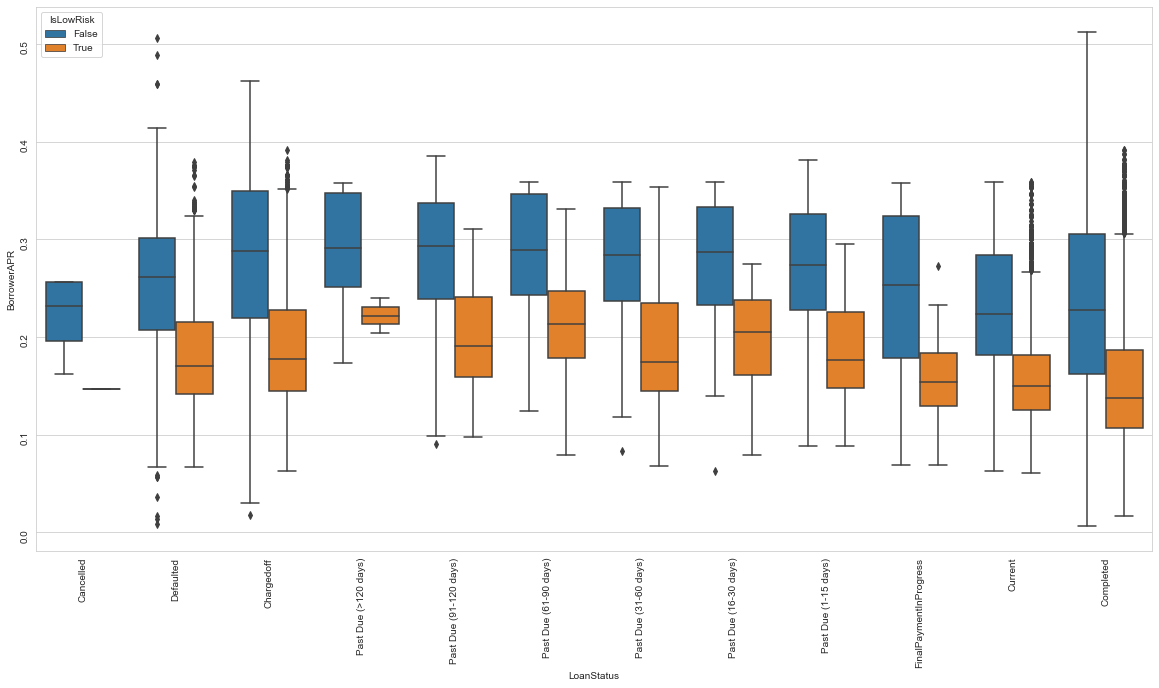

In [25]:
#Create boxplot for the newly created feature
plt.figure(figsize = (20, 10))
num_var = 'BorrowerAPR'
cat_var = 'LoanStatus'
hue1 = 'IsLowRisk'

ax = sns.boxplot(y = num_var, x = cat_var,hue = hue1,
             data = df)
ax.tick_params(labelrotation=90)

**Observation from above Boxplot:**

   - Surprisingly the `interaction between IsBorrowerHomeowner, Income Verifiable, CreditGrade, and ProsperScore` give some clue of the `loan default behavior.`
   - Now It's more obvious with the newly engineered feature, where the `variation` between people with `Low & High risk is now larger.` In Other Words `people that borrow at low interest rate and have a low risk score are less likely to default.`

### 4.4 Heatmap<a id='4.4'></a>

What is the relation between the count of the loans for each category and the newly engineered feature?
</br>

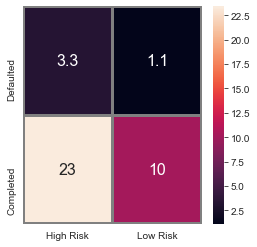

In [26]:
#create a crosstab between loanStatus and IsLowRisk and normalize values to 100
#slice the dataframe to keep only Defaulted and Completed LoanStatus 
plt.figure(figsize = (4, 4))
sns.heatmap((pd.crosstab(df.LoanStatus, df.IsLowRisk, normalize=True).iloc[[1,-1],:]*100), annot = True, linewidths = 2, linecolor='grey', xticklabels=['High Risk', 'Low Risk'], annot_kws=dict(fontsize = 16))
plt.xlabel('')
plt.ylabel('');

**The percentage of `High Risk Defaulted is 3 times higher` `than Low Risk Defaulted Loans`, which means that `Low Risk Loans are less Likely to Default.`** 